In [11]:
import itertools
import glob
import os

import matplotlib.pylab as plt
import numpy as np

from continuous_net_jax.convergence import *
from continuous_net_jax.basis_functions import *
from continuous_net_jax.basis_functions_plotting import *

In [2]:
DIR = "../runs_cifar10_e/"
paths = glob.glob(f"{DIR}/*")

In [3]:
paths

['../runs_cifar10_e/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=Euler,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210514-045518',
 '../runs_cifar10_e/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=RK4,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210514-060012',
 '../runs_cifar10_e/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=Euler,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210514-050509']

In [4]:
ct = ConvergenceTester(paths[2])

In [35]:
sel = lambda w : w['params']['Conv_0']['kernel'][0,0,0,0]
def plot_final(ct):
    w = list(map(sel, ct.params['ContinuousNet_0']['ode_params']))
    PLOT[ct.eval_model.basis](w)
def plot_projected(ct, basis, n_basis):
    _, params, _ = ct.project(basis, n_basis)
    w = list(map(sel, params['ContinuousNet_0']['ode_params']))
    PLOT[basis](w)

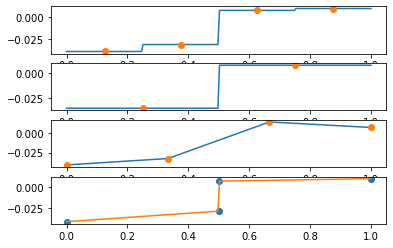

In [38]:
plt.figure()
plt.subplot(411)
plot_final(ct)
plt.subplot(412)
plot_projected(ct, 'piecewise_constant', 2)
plt.subplot(413)
plot_projected(ct, 'fem_linear', 4)
plt.subplot(414)
plot_projected(ct, 'piecewise_linear', 4)